In [1]:
from qibolab.pulses import (
    DrivePulse,
    ReadoutPulse,
    PulseSequence,
    Rectangular,
    Gaussian,
)

# Define PulseSequence
sequence = PulseSequence()

# Add some pulses to the pulse sequence
sequence.add(
    DrivePulse(
        start=0,
        frequency=200000000,
        amplitude=0.3,
        duration=60,
        relative_phase=0,
        shape=Gaussian(5),
        qubit=0,
    )
)
sequence.add(
    ReadoutPulse(
        start=70,
        frequency=20000000.0,
        amplitude=0.5,
        duration=3000,
        relative_phase=0,
        shape=Rectangular(),
        qubit=0,
    )
)

In [2]:
from qibolab import create_platform
from qibolab.execution_parameters import ExecutionParameters

# Define platform and load specific runcard
platform = create_platform("dummy")

# Connects to lab instruments using the details specified in the calibration settings.
platform.connect()

# Configures instruments using the loaded calibration settings.
platform.setup()

# Turns on the local oscillators
platform.start()

# Executes a pulse sequence.
options = ExecutionParameters(nshots=1000, relaxation_time=100)
results = platform.execute_pulse_sequence(sequence, options=options)

# Turn off lab instruments
platform.stop()

# Disconnect from the instruments
platform.disconnect()

[Qibo 0.2.2|INFO|2023-11-27 12:03:32]: Loading platform dummy
[Qibo 0.2.2|INFO|2023-11-27 12:03:32]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x000001EAC1F5F050>.
[Qibo 0.2.2|INFO|2023-11-27 12:03:32]: Connecting to dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:32]: Connecting to instrument <qibolab.instruments.oscillator.LocalOscillator object at 0x000001EAC2193510>.
[Qibo 0.2.2|INFO|2023-11-27 12:03:32]: Setting up dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:32]: Starting dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:32]: Minimal execution time (seq): 0.00317
[Qibo 0.2.2|INFO|2023-11-27 12:03:32]: Stopping dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:32]: Disconnecting dummy instrument.


In [3]:
import numpy as np
import qibo
from qibo import Circuit, gates

np.random.seed(0)

# create a single qubit circuit
circuit = Circuit(1)

# attach Hadamard gate and a measurement
circuit.add(gates.H(0))
circuit.add(gates.M(0))

# execute on quantum hardware
qibo.set_backend("qibolab", "dummy")
hardware_result = circuit(nshots=5000)

# retrieve measured probabilities
freq = hardware_result.frequencies()
p0 = freq["0"] / 5000 if "0" in freq else 0
p1 = freq["1"] / 5000 if "1" in freq else 0
hardware = [p0, p1]

# execute with classical quantum simulation
qibo.set_backend("numpy")
simulation_result = circuit(nshots=5000)

simulation = simulation_result.probabilities(qubits=(0,))

[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Loading platform dummy
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Using qibolab (dummy) backend on /CPU:0
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x000001EAC2733F90>.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Connecting to dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Connecting to instrument <qibolab.instruments.oscillator.LocalOscillator object at 0x000001EAC27332D0>.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Setting up dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Starting dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Minimal execution time (seq): 0.010400000000000001
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Stopping dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Using numpy backend on /CPU:0


In [4]:
print(f"Qibolab: P(0) = {hardware[0]:.2f}\tP(1) = {hardware[1]:.2f}")
print(f"Numpy:   P(0) = {simulation[0]:.2f}\tP(1) = {simulation[1]:.2f}")

Qibolab: P(0) = 0.49	P(1) = 0.51
Numpy:   P(0) = 0.50	P(1) = 0.50


[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Loading platform dummy
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Using qibolab (dummy) backend on /CPU:0
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Connecting to instrument <qibolab.instruments.dummy.DummyInstrument object at 0x000001EAC3B28110>.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Connecting to dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Connecting to instrument <qibolab.instruments.oscillator.LocalOscillator object at 0x000001EAA108EC50>.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Setting up dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Starting dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Minimal execution time (seq): 0.008320000000000001
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Stopping dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Starting dummy instrument.
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Minimal execution time (seq): 0.008320000000000001
[Qibo 0.2.2|INFO|2023-11-27 12:03:33]: Stopping dummy instrum

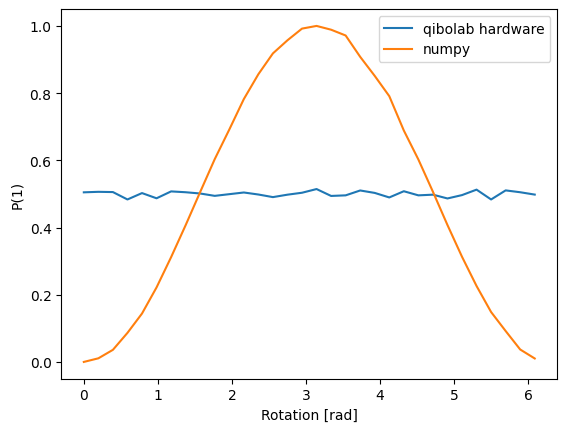

: 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from qibo import Circuit, gates


def execute_rotation():
    # create single qubit circuit
    circuit = Circuit(1)

    # attach Rotation on X-Pauli with angle = 0
    circuit.add(gates.RX(0, theta=0))
    circuit.add(gates.M(0))

    # define range of angles from [0, 2pi]
    exp_angles = np.arange(0, 2 * np.pi, np.pi / 16)

    res = []
    for angle in exp_angles:
        # update circuit's rotation angle
        circuit.set_parameters([angle])

        # execute circuit
        result = circuit.execute(nshots=4000)
        freq = result.frequencies()
        p0 = freq['0'] / 4000 if '0' in freq else 0
        p1 = freq['1'] / 4000 if '1' in freq else 0

        # store probability in state |1>
        res.append(p1)

    return res


# execute on quantum hardware
qibo.set_backend("qibolab", "dummy")
hardware = execute_rotation()

# execute with classical quantum simulation
qibo.set_backend("numpy")
simulation = execute_rotation()

# plot results
exp_angles = np.arange(0, 2 * np.pi, np.pi / 16)
plt.plot(exp_angles, hardware, label="qibolab hardware")
plt.plot(exp_angles, simulation, label="numpy")

plt.legend()
plt.ylabel("P(1)")
plt.xlabel("Rotation [rad]")
plt.show()